In [0]:
import os
import pandas as pd
import datetime
import mpl_toolkits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from mpl_toolkits.basemap import Basemap

#import datetime
#import geopandas as gpd
#import geoplot as gplt
#import geoplot.crs as gcrs

from matplotlib.animation import ArtistAnimation

plt.style.use('default')

CONFIRMED_CASES_TIME_SERIES_CSV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATH_CASES_TIME_SERIES_CSV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED_CASES_TIME_SERIES_CSV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'



In [0]:
# needed to know the latest column in the timeseries
first_date = datetime.date(2020, 1, 22)
yesterday = (datetime.datetime.today() - datetime.timedelta(days=1)).date()
#latest_column_name = yesterday.strftime('%m/%d/%y')
latest_column_name = yesterday.strftime('%Y-%m-%d')


#CONFIRMED_CASES_TS_CSV = 'https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

#confirmed_cases_ts = pd.read_csv(CONFIRMED_CASES_TS_CSV)
confirmed_cases_timeseries = pd.read_csv(CONFIRMED_CASES_TIME_SERIES_CSV)
death_cases_timeseries = pd.read_csv(DEATH_CASES_TIME_SERIES_CSV)
recovered_cases_timeseries = pd.read_csv(RECOVERED_CASES_TIME_SERIES_CSV)

#confirmed_cases_ts.head()
confirmed_cases_timeseries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48


In [0]:
confirmed_cases_timeseries = confirmed_cases_timeseries[confirmed_cases_timeseries['Country/Region'] != 'Diamondd Princess']
death_cases_timeseries = death_cases_timeseries[death_cases_timeseries['Country/Region'] != 'Diamondd Princess']
recovered_cases_timeseries = recovered_cases_timeseries[recovered_cases_timeseries['Country/Region'] != 'Diamondd Princess']


all_countries_confirmed_cases_timeseries = confirmed_cases_timeseries.sum()
all_countries_death_cases_timeseries = death_cases_timeseries.sum()
all_countries_recovered_cases_timeseries = recovered_cases_timeseries.sum()

all_countries_confirmed_cases_timeseries

Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
Lat                                                         5625.38
Long                                                        5995.28
1/22/20                                                         555
1/23/20                                                         654
                                        ...                        
5/12/20                                                     4261747
5/13/20                                                     4347018
5/14/20                                                     4442163
5/15/20                                                     4542347
5/16/20                                                     4634068
Length: 119, dtype: object

In [0]:
print("The Shape of Cornirmed is: ", confirmed_cases_timeseries.shape)
print("The Shape of Death is: ", death_cases_timeseries.shape)
print("The Shape of Recovered is: ", recovered_cases_timeseries.shape)


The Shape of Cornirmed is:  (266, 120)
The Shape of Death is:  (266, 120)
The Shape of Recovered is:  (253, 120)


In [0]:
USA=confirmed_cases_timeseries[confirmed_cases_timeseries['Country/Region'] == 'US']
USA

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,...,397121,428654,462780,496535,526396,555313,580619,607670,636350,667592,699706,732197,758809,784326,811865,840351,869170,905358,938154,965785,988197,1012582,1039909,1069424,1103461,1132539,1158040,1180375,1204351,1229331,1257023,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820


In [0]:
India=confirmed_cases_timeseries[confirmed_cases_timeseries['Country/Region'] == 'India']
India

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,5311,5916,6725,7598,8446,9205,10453,11487,12322,13430,14352,15722,17615,18539,20080,21370,23077,24530,26283,27890,29451,31324,33062,34863,37257,39699,42505,46437,49400,52987,56351,59695,62808,67161,70768,74292,78055,81997,85784,90648


In [0]:
latest_confirmed_USA = USA.iloc[:, -7:]
latest_confirmed_USA

,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
131,67161,70768,74292,78055,81997,85784,90648


In [0]:
#Everything seems to be in place. Let’s sum all rows, so we get the cumulative daily cases
USA_weekly = latest_confirmed_USA.sum(axis=0)
USA_weekly.index = pd.to_datetime(USA_weekly.index)
USA_weekly.head(7)


2020-05-10    67161
2020-05-11    70768
2020-05-12    74292
2020-05-13    78055
2020-05-14    81997
2020-05-15    85784
2020-05-16    90648
dtype: int64

Text(0, 0.5, 'Confirmed Cases')

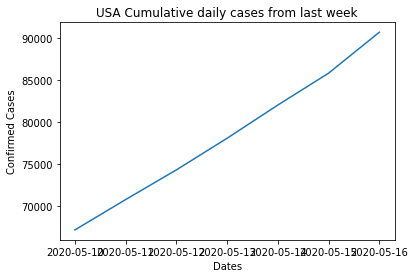

In [0]:
plt.plot(USA_weekly)
plt.title("USA Cumulative daily cases from last week");
plt.xlabel("Dates")
plt.ylabel("Confirmed Cases")

In [0]:
def plot_cases_timeseries(confirmed_series, death_series, recovered_series, start_date=None):
    start_date = start_date or first_date
    day_count = (yesterday - start_date).days + 1
    
    timeseries = []

    for date_obj in (start_date + datetime.timedelta(n) for n in range(day_count)):
        column_name = date_obj.strftime('%Y-%m-%d')

        timeseries += [{
            'date': date_obj,
            'case_count': confirmed_series[column_name],
            'death_count': death_series[column_name],
            'recovered_count': recovered_series[column_name],
        }]

    timeseries_df = pd.DataFrame(timeseries, columns=['date', 'case_count', 'death_count', 'recovered_count'])
    timeseries_df = timeseries_df.set_index('date')

    timeseries_df.plot()
plot_cases_timeseries(
all_countries_confirmed_cases_timeseries,
all_countries_death_cases_timeseries,
all_countries_recovered_cases_timeseries,
)

Covid-Analysis

https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction
https://www.kdnuggets.com/2020/04/coronavirus-covid-19-genome-analysis-biopython.html
https://github.com/Pitsillides91/Python-Tutorials/blob/master/CoronaVirus/Corona%20Virus%20Project%20-%20Evolution.ipynb
https://github.com/Stevesie/jupyter-notebooks/blob/master/Coronavirus%20Visualization.ipynb
https://raw.githubusercontent.com/Stevesie/jupyter-notebooks/master/Coronavirus%20Visualization.ipynb
https://www.curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/
https://www.youtube.com/watch?v=cxLht5KN3pQ